## Support Vector Machines
- SVM is a powerful classifier that works both on linearly and non-linearly separable data
<img src="img/linearly_separable.png" alt="Linear Separable" style="width: 500px;"/>



- Finds an optimal hyperplane, that best separates our data so that the distance from nearest points in space to itself(also called margin) is maximized
- These nearest points are called **Support Vectors**

<figure>
<img src="img/svm_margin.png" alt="Pizza-1" style="width: 300px;"/>

- For the non-linearly separable case, it uses something called 'Kernel Trick'
    



## What does hyperplane mean ?

<img src="img/hyperplanes.jpg" alt="Hyperplanes" style="width: 250px;"/>

A hyperplane is plane of _n-1_ dimensions in _n_ dimensional feature space, that separates the two classes. 
For a 2-D feature space, it would be a line and for a 3-D Feature space it would be plane and so on.

<img src="img/3d_hyperplane.png" alt="Hyperplanes" style="width: 200px;"/>



A hyperplane is able to separate classes if for all points -

#### **_w_ x** + b > 0 
(For data points in class 1)  
#### **_w_ x** + b < 0 
(For data points in  class 0)

## Maximum Margin Hyperplane 

An optimal hyperplane best separates our data so that the distance/margin from nearest points(called Support Vectors) in space to itself is maximized.

<img src="img/maximum_margin.png" alt="Hyperplanes" style="width: 400px;"/>


### SVM Implementation using Pegasos

**Formulating SVM as Unconstrainted Optimization Problem**
** As applying Gradient Descent on Constrainted Optimization is Not Possible **

Paper - [Pegasos: Primal Estimated sub-GrAdient SOlver for SVM](http://www.ee.oulu.fi/research/imag/courses/Vedaldi/ShalevSiSr07.pdf)

The final SVM Objective we derived was -

<img src="img/loss.png" alt="Hinge Loss" style="width: 400px;"/>



## Generate Dataset

## We will use pegasos which formulate SVM as unconstrained optimization Problem

In [26]:
# For Plotting the inbuilt Dataset 
# i.e we will use the inbuilt Dataset of sklearn
from matplotlib import pyplot as plt

In [27]:
# Using inbuilt dataset
from sklearn.datasets import make_classification

## Generating syntheic classification data using sklearn

In [28]:
# We are talking about Binary classification 
# So number of features are two

# n_classes= Number of classes(Labels) of a classification Problem
# n_samples= Number of Samples by default 100 i.e basically number of Points
# n_clusters_per_class must be smaller than or equal to 2 

# Clustering is the task of grouping a set of objects in such a way that objects in the same group 
# called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

# n_cluster =1 means for each class we have 1 cluster means in total we have 2 cluster

X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

## Labels should not be 0,1 instead it should be 1 and -1
## As we have the formula   
### ti = Y[i]*(np.dot(W,X[i].T)+b)
### SO if Y[i] is 0 we will lose the information and svm will not give us the correct output

In [29]:
Y==0

array([ True, False,  True, False,  True, False, False,  True,  True,
       False,  True, False, False,  True, False, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True, False, False,
        True,  True,  True, False, False,  True,  True, False, False,
        True, False,  True, False, False, False,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True, False, False,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False,  True, False, False,  True,  True,  True, False,
       False, False,

In [30]:
# Convert our Y-Labels into {1,-1}
# Make all those values as -1 where Y==0 or values is true
# We can use the for loop but below method is known as broadcasting is efficient
Y[Y==0] = -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

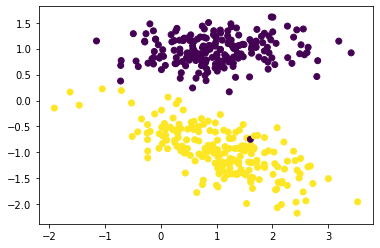

In [31]:
# Giving All rows and 0th feature and All rows and first Feature
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

# We will try to find the optimal hyperplane for this dataset
## As this dataset is linearly seprable if we ignore the outliers we can see it visually 

In [33]:
import numpy as np

In [34]:
print(X.shape)

(400, 2)


In [35]:
# Prerequsite for the below box 
ids=np.arange(100)
np.random.shuffle(ids)
print(ids)

[ 4 67 76 36 97  2 72 98 26 81 65 45 64 96 99  6 48 14 16 92 54 89 20 62
 69 87 90 49 11 91 23 24 75 77 53 41 13  0 37 51  8 80 47 18  3 70 40 82
 34  7 56 86 93 21 68 71 22 85 84 95 79 66 57 28 88 27 39 25 63 73 42 32
  1 52 60  5 29 58 31 38 44 12 59 33 46 83 78 50 19 55 30 15 35  9 10 74
 43 61 94 17]


In [36]:
class SVM:
    # Constructor which takes C as a penlaity 
    
    def __init__(self,C=1.0):
        
        # C is basically the Penality of each Miss classification
        # i.e if C is infintity then zero miss classification is allowed 
        # And 0 miss classification may lead to over fitting
        # W is for weight 
        # b is for bias term
        
        self.C = C
        self.W = 0
        self.b = 0
        
        
       
    # Have a look on the formula of Loss before decoding this function
    def hingeLoss(self,W,b,X,Y):
        # Initially Loss is 0
        # Then we will calculate w*wtranspose
        
        loss  = 0.0
        loss += 0.5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        # Going to all the examples and calculating ti
        for i in range(m):
            
            # Dont get confuse by the X[i].T as we can see that X is of the shape (400,2)
            # As we are intilaizing it as W = np.zeros((1,no_of_features))
            # W has 1 row and no_of_features as cols we can manipulate the formula as matrix multiplication
            # W has also two labels w1 and w2 and when we multiply we get w1x1+w2x2 for each row or ti
            # Then adding a scaler bias (b) to it
            
            ti = Y[i]*(np.dot(W,X[i].T)+b)
        
            # Iterating over all the examples 
            # and calculating max of 0 and (1-ti) 
            # After that multipyling it with C
            
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    
    
    
    
    
    
    
    # IF we want to apply batch_gradient Descent we can specify the batch_size also
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        
        no_of_features = X.shape[1]# How many features we have
        no_of_samples = X.shape[0] # How many examples we have
        
        
        n = learning_rate
        c = self.C
        
        
        # Initialize the model parameters
        # W has 1 row and no_of_features as cols
        
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        # Training from here...
        # Weight and Bias update rule that we discussed!
        
        
        # Making the array of losses so that we can plot what loss we are going to make
        losses = []
        
        
        for i in range(maxItr):
            # Training Loop
            # i.e Training of actual fit function start from here by using weight and bias update rule
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            
            
            # We are using batch gradient descent with random shuffing as mentioned in the research paper
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            
            # Batch Gradient Descent(Paper) with random shuffling
            # What we will do after the shuffing is Pick the first batch compute gradient over the batch
            # and then update weight and biases and then go to next batch of random elemnts and do the same
            # We will iterate over the batch by taking the jump of batch size 
            # This is known as iterating over all the batches in one epoch
            
            
            for batch_start in range(0,no_of_samples,batch_size):
                # Assume 0 gradient for the batch
                
                # these terms are differntial of L wrt to w (i.e gradw) 
                # and differntial of L wrt to b (i.e gradb)
                gradw = 0
                gradb = 0
                
                # Iterate over all examples in the mini batch
                # Open copy and see all the formulas no exuse u bhenchod 
                for j in range(batch_start,batch_start+batch_size):
                    
                    # Below if condition is to check that j should not out off range
                    # Say we have a batch size of 4 and 10 examples so at the end we only have 2 more examples
                    # Hence to take care of this condition
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        # If ti>1 then both the gradients are 0 
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                # We have adjusted the two negative as positive
                # Gradient for the batch is ready! Update W,B i.e weight and Bias
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses
    
    
                
                    
        

In [37]:
mySVM = SVM(C=1000)
W,b,losses = mySVM.fit(X,Y,maxItr=100)
print(losses[0])
print(losses[-1])

400000.0
16256.76271285527


## Intial loss is 400000 and final loss is 19291 i.e loss has not been reduce very much  as C is infinty now

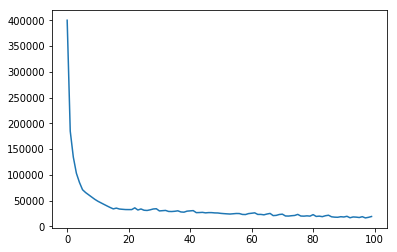

In [121]:
plt.plot(losses)
plt.show()

In [38]:
mySVM = SVM(C=10)
W,b,losses = mySVM.fit(X,Y,maxItr=100)
print(losses[0])
print(losses[-1])

4000.0
75.34033001562474


## Here we have reduce the c , 
## so the final error has been reduced to 75

## We can see that loss is continously decresing

In [122]:
W,B = mySVM.W,mySVM.b
print(W,B)


# These are the parameters learn by our Model we will draw a line by using these parameters 
# We will draw the line of the form w1x1+w2x2+b=0
# x1 is on yaxis and x2 is on xaxis

[[ -9.59475748 -33.34542917]] 4.0


## If we have x1 we can generate x2=(b-w1x1)/w2

In [118]:
def plotHyperplane(w1,w2,b):
    
    # Increasing the figure size
    plt.figure(figsize=(12,12))
    
    
    # Generating 10 points between -2 and 4
    x_1 = np.linspace(-2,4,10)
    
    
    # WT + B = 0
    x_2 = -(w1*x_1+b)/w2
    
    
    
    # i.e for the positive hyperplane we need to add and subtract one from the bias
    
    
    # WT + B = -1
    x_p = -(w1*x_1+b+1)/w2
    
    
    # WT + B = +1
    x_n = -(w1*x_1+b-1)/w2 
    
    
    plt.plot(x_1,x_2,label="Hyperplane WX+B=0")
    plt.plot(x_1,x_p,label="+ve Hyperplane WX+B=1")
    plt.plot(x_1,x_n,label="-ve Hyperplane WX+B=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
    
    

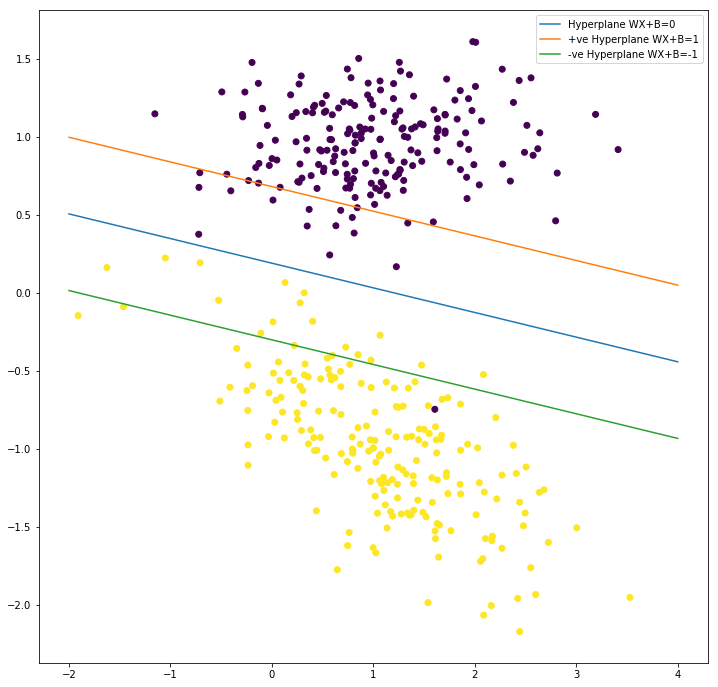

In [119]:
plotHyperplane(W[0,0],W[0,1],B)

##  Visualising Support Vectors, Positive and Negative Hyperplanes
##  Here we are visualizing the support vectors

##  In the above graph we have some penailty c i.e c is not infinity 
##  in the above figures hence we have some outliers

In [111]:
#  Effect the changing 'C' - Penalty Constant
#  And also seeing where are the support vectors

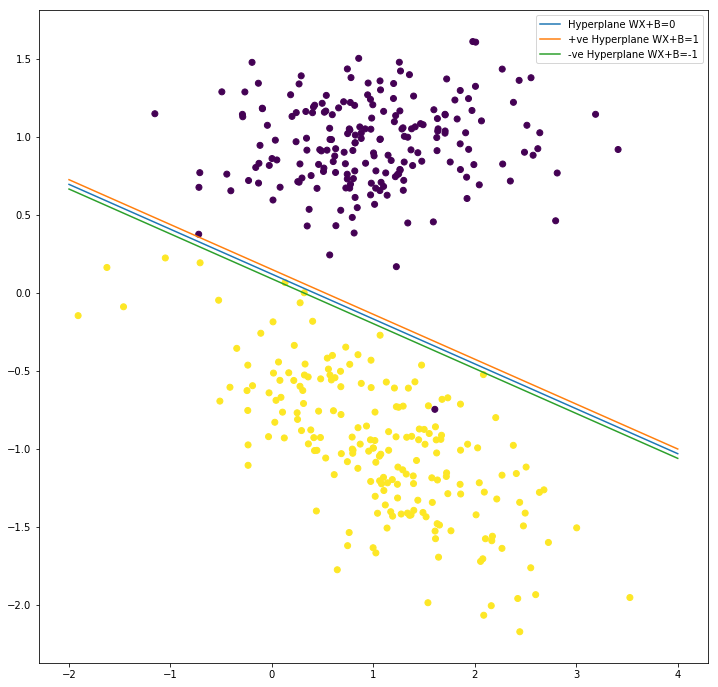

In [125]:
plotHyperplane(W[0,0],W[0,1],B)

## Handling the Non linear seprable data without hampering the accuracy i.e here linear svm and logisitic Regression will not work

## Here in these examples we cannot use the linear classfier such as logistic regression

## What commonly done is that we increase the dimesion i.e say we have 2-D plot so we can 
## Plot x1 and x2 i.e  we can create 3rd dimension  of the points x1*X1+x2*X2 and then some separable difference is visible and now we can seprate the data with a plane in between them on a 3-d dimension


# Project the data in higher dimesion so that it become linearly seprable

In [2]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

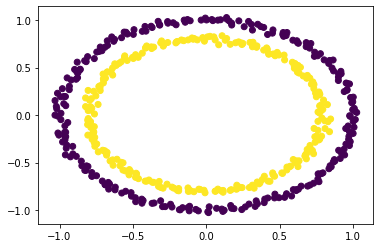

In [3]:
X,Y = make_circles(n_samples=500,noise=0.02)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [4]:
print(X.shape,Y.shape)

(500, 2) (500,)


## Now we will Project the concentric circles into some higher dimensional i.e say 3-d dimension and then use plane to seprate them i.e we will increase the number of features from 2 to 3

In [5]:
def phi(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    
    # For all the rows copy data into all the cols expect last col 
    # i.e copy data into first two cols
    X_[:,:-1] = X
    
    
    # In the last col (i.e 3rd col) put the x3 which is our derived feature
    X_[:,-1] = X3
    
    
    return X_

In [6]:
X_ = phi(X)

(500, 3)


## Now our data is acutally converted into 3 dimension

In [7]:
# Printing first two rows and all the cols of X and X_
print(X[:2,:])
print(X_[:2,:])



#  we can see that dimensions has been increased
#  3rd col in the sum of square of first two cols

[[ 0.53375239 -0.86608378]
 [ 0.70720689 -0.73610303]]
[[ 0.53375239 -0.86608378  1.03499273]
 [ 0.70720689 -0.73610303  1.04198926]]


In [8]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    
    # depthshade help us to add some transparency to the Pixels at some depth
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

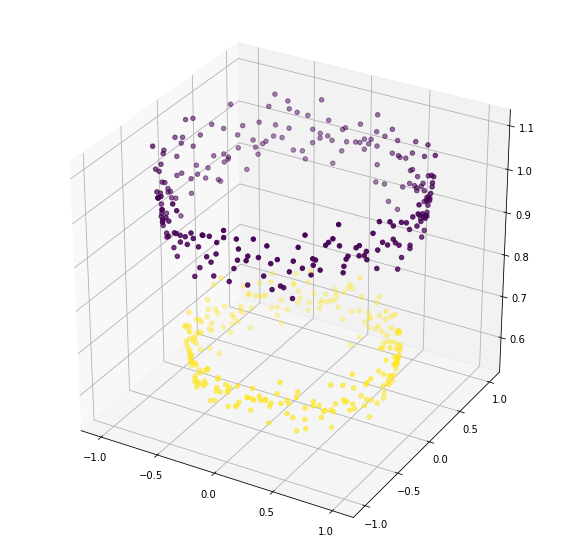

In [9]:
ax = plot3d(X_)

## Now we should be able to seprate the data i.e we can draw a plane which can reduce the noise of the data 

## Now we can use logisitic classifier or any other linear classifier to seprate this dataset

# Logisitic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [12]:
lr = LogisticRegression()

In [13]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 46.8000


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

## We can see that accuracy is 46 percent

In [14]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 100.0000


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

## and if we use X_ accuracy has been increased to 100 percent

In [15]:
# Visualise the Decision Surface
lr.fit(X_,Y)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
wts = lr.coef_
print(wts)

[[-7.04557147e-05  2.63445683e-02 -8.88926929e+00]]


In [17]:
bias = lr.intercept_

In [18]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [19]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.80046876 0.80046083 0.8004529  0.80044498]
 [0.80343239 0.80342447 0.80341654 0.80340862]
 [0.80639603 0.8063881  0.80638018 0.80637225]
 [0.80935967 0.80935174 0.80934382 0.80933589]]


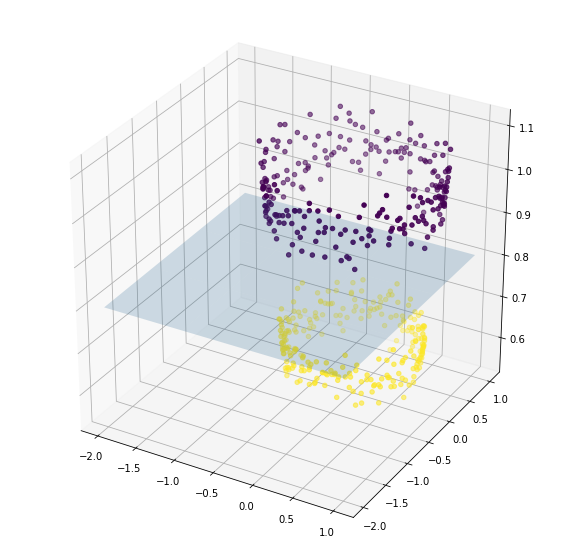

In [20]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

## Now we will formuate the sepration based on the concept of langarian (i.e refered from CS229 by andrew ang)

# Formation of SVM using Langargian

## Kerenals are basically function which transform our dataset into some higher dimension space i.e where vector is represented as pi(x)

#### Kernel Based Classifcation in SVM's
#### Sklearn supports the following types of Kernels, which can be used in many-real life problems.

### Linear Kernel
#### RBF Kernel
#### Polynomial Kernel
#### Sigmoid Kernel
#### Kernel trick is method of using a linear classifer to solve a non-linear problem. It transforms the linearly in-separable data into linearly separable one.

In [22]:
# As we have seen above that for each data point we are calculating the x3 i.e for each and 
# every x1 and x2 we are caluating the x3 what kernals do it reduce the compuation for each and every point 
# i.e say some kerneal will say add all the points and then square it up and so on i.e 
# we are increaing the dimension but still  reducing the computation

In [23]:
from sklearn import svm
svc = svm.SVC(kernel="linear")
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
svc.score(X,Y)

0.508

In [25]:
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

In [26]:
svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X,Y)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6

In [27]:
# Own made custom kernal
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0

## Either we can see that which kernal is best of we can use the grid search to automate this thing

## Grid search for best Hyperparameters

In [29]:
import multiprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn import svm





# Making a list of dictonary specifying Kernels and the value of c we want to test
params = [
    {
    'kernel':['linear','rbf','poly','sigmoid'],
    'C' : [0.1,0.2,0.4,0.5,1.0,2.0,5.0]
    }
]

In [30]:
digits = load_digits()

X = digits.data
Y  = digits.target
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


## Lets see the accuracy of Logistic Regression then we do the same for svm

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cross_val_score(lr,X,Y,scoring="accuracy",cv=5).mean()

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

0.9210188113360701

## 92 percent accurate

In [32]:
svc = svm.SVC()
cross_val_score(svc,X,Y,scoring="accuracy",cv=5).mean()

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

0.44878680061604637

## 44 precerent accurate

## Pretty bad result for svm now modifying our result
## The reason for this bad accuracy is that we are not using the correct set of hyperparameter

## i.e we will check the different kernals and with different values of c
## This can be achived by using grid search

In [33]:
# To know how many cpu our machine support 

import multiprocessing
cpu_cnt = multiprocessing.cpu_count()
print(cpu_cnt)

4


## it means our machine support 4 cpu 

In [35]:
from sklearn.model_selection import GridSearchCV


# Specifying the cross validation is equal to 5 i.e cv=5 
# Specifying n_jobs equal to number of cpu to speed up the task

# If we specify n_jobs=-1 it will then figure our how many maximum cpu's are needed
gs = GridSearchCV(estimator=svc,param_grid = params,scoring='accuracy',cv=5,n_jobs=cpu_cnt)
gs.fit(X,Y)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=4,
             param_grid=[{'C': [0.1, 0.2, 0.4, 0.5, 1.0, 2.0, 5.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
gs.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
gs.best_score_

0.9699499165275459

## Now the outcome is that c is 0.1 is the best value
## comparision scheme is ovr(one vs rest) and polynomial kernel with a accuracy of 96.9 %


## We can see that it is important to tune our svm else it can give very bad result